# UpSampling

### Conv2DTranspose:
Conv2DTranspose is a layer in Keras that performs "deconvolution" or "transposed convolution." It is used to increase the spatial dimensions of the input data, making it larger. This is often used in tasks like image generation, where you want to upscale an image or produce a higher resolution version from a lower resolution input.

#### Deconvolution

- A stride value greater than 1 is used, which effectively increases the spatial dimensions of the feature map.
- The kernel is placed at a certain location in the output feature map, and its values are multiplied by the corresponding values in the input (lower-resolution) feature map.
- The results of these multiplications are accumulated at multiple locations in the output feature map, effectively spreading information from each pixel in the input to a larger area in the output.

### UpSampling:
UpSampling is another technique used to increase the spatial dimensions of the input data, but it doesn't learn any parameters like convolutional layers do. It simply repeats the existing values to achieve the desired upsampling factor.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2DTranspose, UpSampling2D
import matplotlib.pyplot as plt

In [2]:
# Generate a sample 4x4 image with one channel
sample_image = np.array([[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12],
                         [13, 14, 15, 16]])

# Reshape the sample image to (1, 4, 4, 1) for Keras
sample_image = sample_image.reshape((1, 4, 4, 1))

# Create a sequential model for Conv2DTranspose
model_conv2dtranspose = Sequential()
model_conv2dtranspose.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', input_shape=(4, 4, 1)))

# Create a sequential model for UpSampling
model_upsampling = Sequential()
model_upsampling.add(UpSampling2D(size=(2, 2), input_shape=(4, 4, 1)))

# Generate upscaled images using both Conv2DTranspose and UpSampling
upscaled_conv2dtranspose = model_conv2dtranspose.predict(sample_image)
upscaled_upsampling = model_upsampling.predict(sample_image)

1/1 [==============================] - 0s 23ms/step


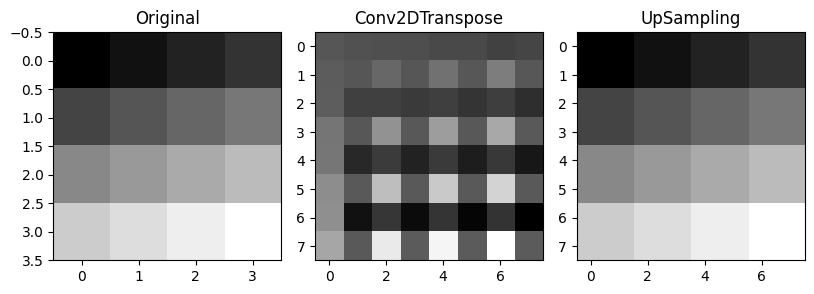

In [3]:
# Plot the original, Conv2DTranspose, and UpSampling images
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Conv2DTranspose")
plt.imshow(upscaled_conv2dtranspose[0, :, :, 0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title("UpSampling")
plt.imshow(upscaled_upsampling[0, :, :, 0], cmap='gray')

plt.tight_layout()
plt.show()